### compare Singletons in PSP vs ADSP controls  

##### Imports & Setup

In [1]:
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib_venn as venn

# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

#### Define File I/O variables

In [2]:
DIR_WS='/mnt/adsp/users/psp_hg38_wes/data_2019_1107'
DIR_SINGLETON = os.path.join(DIR_WS, '02_post_qc', 'singletons')
DIR_OUT_SNV = os.path.join(DIR_WS, '02_post_qc', 'snv')
DIR_PLOT = os.path.join(DIR_SINGLETON, 'plots')

## make output directories (if necessary)
Path(DIR_PLOT).mkdir(parents=True, exist_ok=True) 


## PSP & ADSP Singletons file names
PSP_NIMBLEGEN = os.path.join(DIR_SINGLETON, 'singletons.psp.tsv')
ADSP_NIMBLEGEN = os.path.join(DIR_SINGLETON, 'singletons.adsp_nimblegen.tsv')
ADSP_ILLUMINA = os.path.join(DIR_SINGLETON, 'singletons.adsp_illumina.tsv')


#### functions

In [3]:
def load_singleton_file(curr_file):
    cols = ['CHR', 'POS', 'RefAllele', 'AltAllele', 'on_target']
    yield pd.read_csv(curr_file, sep='\t')[cols]

def get_singleton_sets(curr_file):
    df = next(load_singleton_file(curr_file))
    df['snv'] = df['CHR'] + '_' + df['POS'].astype(str)

    _set_all = set(df['snv'].unique())
    _set_on_target = set(df[df['on_target']==True]['snv'].unique())
    _set_off_target = set(df[df['on_target']==False]['snv'].unique())
    return _set_all, _set_on_target, _set_off_target

## plot fxns
def plot_venn3_diagram(set_psp, set_adsp_n, set_adsp_i, plot_title, plot_file):
#     plt.figure(figsize=(5,5))
    venn.venn3([set_psp, set_adsp_n, set_adsp_i], 
               set_labels=('PSP', 'ADSP - Nimbelgen', 'ADSP - Illumina'), 
               set_colors=('#3366CC', '#FF9900', '#109618'), 
               alpha = 0.7)
    plt.title(plot_title)
    plt.savefig(plot_file+'.png', dpi=300, format='png', bbox_inches=None)
    plt.savefig(plot_file+'.pdf', dpi=300, format='pdf', bbox_inches=None)
    return plt

def plot_venn3_unweighted(set_psp, set_adsp_n, set_adsp_i, plot_title, plot_file):
#     plt.figure(figsize=(5,5))
    venn.venn3_unweighted([set_psp, set_adsp_n, set_adsp_i], 
                          set_labels=('PSP', 'ADSP - Nimbelgen', 'ADSP - Illumina'), 
                          set_colors=('#3366CC', '#FF9900', '#109618'), 
                          alpha = 0.7)
    plt.title(plot_title)
    plt.savefig(plot_file+'.png', dpi=300, format='png', bbox_inches=None)
    plt.savefig(plot_file+'.pdf', dpi=300, format='pdf', bbox_inches=None)
    return plt

#### load singleton files & convert to sets

In [4]:
psp_all, psp_on_target, psp_off_target = get_singleton_sets(PSP_NIMBLEGEN)
adsp_n_all, adsp_n_on_target, adsp_n_off_target = get_singleton_sets(ADSP_NIMBLEGEN)
adsp_i_all, adsp_i_on_target, adsp_i_off_target = get_singleton_sets(ADSP_ILLUMINA)


#### plot venn diagram -- all Singletons

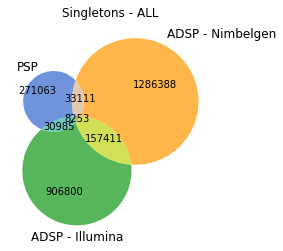

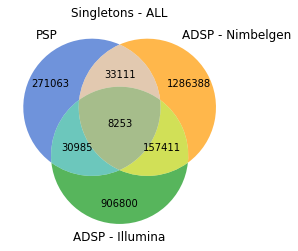

In [5]:
v_all = plot_venn3_diagram(psp_all, adsp_n_all, adsp_i_all, 
                           'Singletons - ALL', 
                           os.path.join(DIR_PLOT, 'venn_diagram_all_singletons'))
v_all.show()


v_all_unweight = plot_venn3_unweighted(psp_all, adsp_n_all, adsp_i_all, 
                                       'Singletons - ALL', 
                                       os.path.join(DIR_PLOT, 'venn_diagram_all_singletons_unweighted'))
v_all_unweight.show()

#### plot venn diagram -- on target Singletons

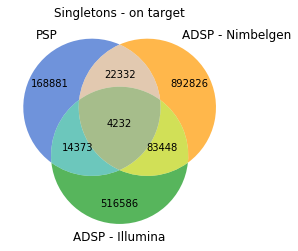

In [6]:
v_on_target = plot_venn3_diagram(psp_on_target, adsp_n_on_target, adsp_i_on_target, 
                                 'Singletons - on target', 
                                 os.path.join(DIR_PLOT, 'venn_diagram_on_target_singletons'))
v_on_target.show()


v_on_unweight  = plot_venn3_unweighted(psp_on_target, adsp_n_on_target, adsp_i_on_target, 
                                       'Singletons - on target', 
                                       os.path.join(DIR_PLOT, 'venn_diagram_on_target_singletons_unweighted'))
v_on_unweight.show()

#### plot venn diagram -- off target Singletons

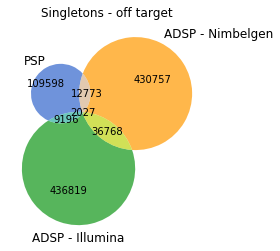

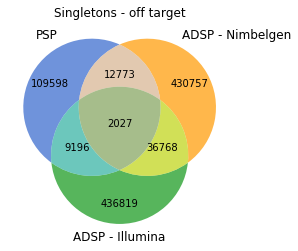

In [7]:
v_off_target = plot_venn3_diagram(psp_off_target, adsp_n_off_target, adsp_i_off_target, 
                                  'Singletons - off target', 
                                  os.path.join(DIR_PLOT, 'venn_diagram_off_target_singletons'))
v_off_target.show()

v_off_unweight  = plot_venn3_unweighted(psp_off_target, adsp_n_off_target, adsp_i_off_target, 
                                        'Singletons - off target',  
                                        os.path.join(DIR_PLOT, 'venn_diagram_off_target_singletons_unweighted'))
v_off_unweight.show()